In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from pathlib import Path 

In [2]:
SpotifyData=pd.read_csv(r'Data\Spotify_Data.csv')
SpotifyData

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,As It Was,As It Was,Harry Styles,2022-03-31,2.788383,96,0.520,0.34200,0.731,0.001010,0.3110,-5.338,0.0557,173.930,4
1,1,I Ain't Worried,I Ain’t Worried (Music From The Motion Picture...,OneRepublic,2022-05-13,2.474750,97,0.704,0.08260,0.797,0.000745,0.0546,-5.927,0.0475,139.994,4
2,2,All Too Well (10 Minute Version) (Taylor's Ver...,Red (Taylor's Version),Taylor Swift,2021-11-12,10.217100,85,0.631,0.27400,0.518,0.000000,0.0880,-8.771,0.0303,93.023,4
3,3,About Damn Time,About Damn Time,Lizzo,2022-04-14,3.197033,90,0.836,0.09950,0.743,0.000000,0.3350,-6.305,0.0656,108.966,4
4,4,Awkward,Ctrl (Deluxe),SZA,2022-06-09,2.966667,78,0.618,0.18200,0.474,0.000122,0.1080,-12.097,0.0789,119.999,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1795,Dilemma,Nellyville,Nelly,2002-06-25,4.819333,79,0.727,0.22700,0.552,0.000164,0.1980,-8.074,0.1400,168.189,4
1796,1796,94 Bentley,Ghetto Lenny's Love Songs,SAINt JHN,2019-08-23,2.823417,61,0.706,0.07920,0.558,0.000000,0.1620,-5.253,0.0525,112.975,4
1797,1797,Breaking Up Was Easy In The 90's,SOUTHSIDE,Sam Hunt,2020-04-03,3.598883,67,0.562,0.23100,0.649,0.000000,0.3410,-5.400,0.0494,145.913,4
1798,1798,Everlong,The Colour And The Shape,Foo Fighters,1997-05-20,4.175767,84,0.413,0.00006,0.881,0.000308,0.0805,-5.541,0.0367,158.066,4


In [3]:
SpotifyData=SpotifyData.drop('Unnamed: 0', axis=1)
SpotifyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1800 non-null   object 
 1   album             1800 non-null   object 
 2   artist            1800 non-null   object 
 3   release_date      1800 non-null   object 
 4   length            1800 non-null   float64
 5   popularity        1800 non-null   int64  
 6   danceability      1800 non-null   float64
 7   acousticness      1800 non-null   float64
 8   energy            1800 non-null   float64
 9   instrumentalness  1800 non-null   float64
 10  liveness          1800 non-null   float64
 11  loudness          1800 non-null   float64
 12  speechiness       1800 non-null   float64
 13  tempo             1800 non-null   float64
 14  time_signature    1800 non-null   int64  
dtypes: float64(9), int64(2), object(4)
memory usage: 211.1+ KB


In [4]:
SpotifyData.describe()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,3.471267,78.575000,0.645459,0.248897,0.617472,0.050235,0.176355,-7.400653,0.122949,122.706540,3.929444
std,1.031729,11.476342,0.165933,0.271620,0.191699,0.186454,0.133997,4.237783,0.120106,30.011841,0.362224
min,0.613950,0.000000,0.000000,0.000008,0.000050,0.000000,0.032700,-32.357000,0.000000,0.000000,0.000000
25%,2.849617,73.000000,0.545000,0.036050,0.509750,0.000000,0.096750,-8.492000,0.039600,99.147000,4.000000
50%,3.391092,80.000000,0.654000,0.125500,0.636500,0.000002,0.121000,-6.509000,0.062550,122.020000,4.000000
75%,3.935892,86.000000,0.775000,0.382000,0.750000,0.000303,0.215250,-5.102000,0.172000,142.004000,4.000000
max,10.217100,100.000000,0.979000,0.996000,0.987000,1.000000,0.914000,-0.514000,0.741000,206.247000,5.000000


In [5]:
SpotifyData.sort_values('popularity', ascending=True)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
1437,2step,I'm Blue - Hits of 2022,Various Artists,2022-10-14,2.724150,0,0.693,0.1380,0.643,0.000000,0.108,-5.867,0.0828,95.055,4
1158,XQ Te Pones Así,Feliz Cumpleaños con Perreo,Various Artists,2022-10-14,3.644883,0,0.812,0.1340,0.697,0.000000,0.147,-3.441,0.0694,92.030,4
815,Qué Más Pues?,Esto me suena a Farra,Various Artists,2022-10-14,3.622683,0,0.904,0.0254,0.817,0.000141,0.232,-3.956,0.0871,101.988,4
1761,911,Para entrar en calor,Various Artists,2022-10-14,3.696000,0,0.798,0.0519,0.857,0.000050,0.142,-3.748,0.1050,102.998,4
811,Que Raro,Del gusto de hermanos,Various Artists,2022-10-07,3.847100,1,0.755,0.3280,0.844,0.000009,0.555,-6.234,0.3260,171.867,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),Sam Smith,2022-09-22,2.615717,100,0.714,0.0130,0.472,0.000005,0.266,-7.375,0.0864,131.121,4
251,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),Sam Smith,2022-09-22,2.615717,100,0.714,0.0130,0.472,0.000005,0.266,-7.375,0.0864,131.121,4
751,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),Sam Smith,2022-09-22,2.615717,100,0.714,0.0130,0.472,0.000005,0.266,-7.375,0.0864,131.121,4
404,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),Sam Smith,2022-09-22,2.615717,100,0.714,0.0130,0.472,0.000005,0.266,-7.375,0.0864,131.121,4


In [6]:
SpotifyData.drop_duplicates(keep='first', inplace=True)
SpotifyData.sort_values('name', ascending=True)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
1043,$uicideboy$ Were Better In 2015,"Sing Me a Lullaby, My Sweet Temptation",$uicideboy$,2022-07-29,2.389100,72,0.883,0.0301,0.822,0.000002,0.1110,-4.029,0.1080,110.024,4
1334,'02 Mercury,'02 Mercury,Jae Zole,2022-03-25,2.744583,50,0.858,0.0128,0.698,0.000000,0.1350,-7.756,0.2830,152.018,4
1610,'68 Fastback,American Heartbreak,Zach Bryan,2022-05-20,3.218783,64,0.366,0.7490,0.276,0.000003,0.2740,-7.201,0.0312,162.051,3
16,"...And to Those I Love, Thanks for Sticking Ar...",Stop Staring At the Shadows,$uicideboy$,2020-02-14,2.808150,83,0.792,0.1240,0.511,0.000090,0.1400,-6.876,0.0409,113.983,4
1332,0 2 220,0 2 220,caunc,2022-07-11,1.598300,53,0.789,0.6430,0.254,0.000500,0.1680,-17.586,0.4620,149.996,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,xanny,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Billie Eilish,2019-03-29,4.062083,74,0.521,0.7510,0.125,0.002070,0.2650,-17.832,0.2390,111.554,4
1234,you broke me first,you broke me first,Tate McRae,2020-04-17,2.821083,84,0.667,0.7850,0.373,0.000000,0.0906,-9.389,0.0500,124.148,4
832,¿Qué Nos Pasó?,¿Qué Nos Pasó?,Anuel AA,2022-05-26,4.095633,77,0.703,0.4360,0.694,0.000006,0.1200,-4.808,0.0607,95.000,4
1705,‘87 Stingray,Alone At Prom,Tory Lanez,2021-12-10,2.355550,68,0.498,0.1390,0.931,0.000005,0.1110,-6.182,0.0737,193.434,3


In [7]:
SpotifyData.sort_values('popularity', ascending=True)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
815,Qué Más Pues?,Esto me suena a Farra,Various Artists,2022-10-14,3.622683,0,0.904,0.02540,0.817,0.000141,0.232,-3.956,0.0871,101.988,4
1437,2step,I'm Blue - Hits of 2022,Various Artists,2022-10-14,2.724150,0,0.693,0.13800,0.643,0.000000,0.108,-5.867,0.0828,95.055,4
1761,911,Para entrar en calor,Various Artists,2022-10-14,3.696000,0,0.798,0.05190,0.857,0.000050,0.142,-3.748,0.1050,102.998,4
1158,XQ Te Pones Así,Feliz Cumpleaños con Perreo,Various Artists,2022-10-14,3.644883,0,0.812,0.13400,0.697,0.000000,0.147,-3.441,0.0694,92.030,4
811,Que Raro,Del gusto de hermanos,Various Artists,2022-10-07,3.847100,1,0.755,0.32800,0.844,0.000009,0.555,-6.234,0.3260,171.867,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,La Bachata,La Bachata,Manuel Turizo,2022-05-26,2.710617,98,0.835,0.58300,0.679,0.000002,0.218,-5.329,0.0364,124.980,4
58,Tití Me Preguntó,Un Verano Sin Ti,Bad Bunny,2022-05-06,4.061933,98,0.650,0.09930,0.715,0.000291,0.126,-5.198,0.2530,106.672,4
55,I'm Good (Blue),I'm Good (Blue),David Guetta,2022-08-26,2.920633,99,0.561,0.00383,0.965,0.000007,0.371,-3.673,0.0343,128.040,4
76,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap,2022-07-06,3.315617,99,0.621,0.01250,0.782,0.033000,0.230,-5.548,0.0440,128.033,4


In [8]:
print('Songs with popularity>80: ',(SpotifyData['popularity']>80).sum())
print('Songs with popularity>75: ',(SpotifyData['popularity']>75).sum())
print('Songs with popularity>70: ',(SpotifyData['popularity']>70).sum())
print('Songs with popularity>65: ',(SpotifyData['popularity']>65).sum())
print('Songs with popularity>60: ',(SpotifyData['popularity']>60).sum())

Songs with popularity>80:  427
Songs with popularity>75:  689
Songs with popularity>70:  907
Songs with popularity>65:  1047
Songs with popularity>60:  1156


In [9]:
TopSongs=SpotifyData[SpotifyData['popularity']>70]
TopSongs

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,As It Was,As It Was,Harry Styles,2022-03-31,2.788383,96,0.520,0.34200,0.731,0.001010,0.3110,-5.338,0.0557,173.930,4
1,I Ain't Worried,I Ain’t Worried (Music From The Motion Picture...,OneRepublic,2022-05-13,2.474750,97,0.704,0.08260,0.797,0.000745,0.0546,-5.927,0.0475,139.994,4
2,All Too Well (10 Minute Version) (Taylor's Ver...,Red (Taylor's Version),Taylor Swift,2021-11-12,10.217100,85,0.631,0.27400,0.518,0.000000,0.0880,-8.771,0.0303,93.023,4
3,About Damn Time,About Damn Time,Lizzo,2022-04-14,3.197033,90,0.836,0.09950,0.743,0.000000,0.3350,-6.305,0.0656,108.966,4
4,Awkward,Ctrl (Deluxe),SZA,2022-06-09,2.966667,78,0.618,0.18200,0.474,0.000122,0.1080,-12.097,0.0789,119.999,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783,Semi-Charmed Life,Third Eye Blind,Third Eye Blind,1997-04-08,4.472667,75,0.640,0.00832,0.864,0.000000,0.1230,-6.576,0.0314,102.026,4
1784,90x180,90x180,Eno,2022-09-23,2.571217,71,0.822,0.48000,0.564,0.005720,0.1290,-10.726,0.0931,139.982,4
1785,AM Remix,AM Remix,Nio Garcia,2021-06-24,4.355567,80,0.743,0.11400,0.655,0.000000,0.0764,-5.015,0.1590,172.031,4
1792,Ni Diablo Ni Santo,Ni Diablo Ni Santo,Julión Álvarez y su Norteño Banda,2017-05-26,2.593333,74,0.833,0.43900,0.608,0.000000,0.2960,-4.804,0.0824,120.010,3


Dropping features which won't be used in clustering

In [10]:
TopSongsUnclustered=TopSongs.drop(['release_date','name','album','artist','popularity'], axis=1)
TopSongsUnclustered

,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,2.788383,0.520,0.34200,0.731,0.001010,0.3110,-5.338,0.0557,173.930,4
1,2.474750,0.704,0.08260,0.797,0.000745,0.0546,-5.927,0.0475,139.994,4
2,10.217100,0.631,0.27400,0.518,0.000000,0.0880,-8.771,0.0303,93.023,4
3,3.197033,0.836,0.09950,0.743,0.000000,0.3350,-6.305,0.0656,108.966,4
4,2.966667,0.618,0.18200,0.474,0.000122,0.1080,-12.097,0.0789,119.999,4
...,...,...,...,...,...,...,...,...,...,...
1783,4.472667,0.640,0.00832,0.864,0.000000,0.1230,-6.576,0.0314,102.026,4
1784,2.571217,0.822,0.48000,0.564,0.005720,0.1290,-10.726,0.0931,139.982,4
1785,4.355567,0.743,0.11400,0.655,0.000000,0.0764,-5.015,0.1590,172.031,4
1792,2.593333,0.833,0.43900,0.608,0.000000,0.2960,-4.804,0.0824,120.010,3


### Scaling the features
z=(x-u)/s
u: mean
s: standard deviation

In [11]:
scaler=StandardScaler()
TopSongsUnclustered = pd.DataFrame(scaler.fit_transform(TopSongsUnclustered), columns=TopSongsUnclustered.columns)
TopSongsUnclustered

,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,-0.729674,-0.810302,0.422126,0.554434,-0.204559,1.001528,0.501583,-0.525482,1.683282,0.193554
1,-1.041996,0.354231,-0.591069,0.922814,-0.206601,-0.921917,0.306817,-0.596710,0.572280,0.193554
2,6.667985,-0.107785,0.156523,-0.634428,-0.212342,-0.671359,-0.633613,-0.746116,-0.965464,0.193554
3,-0.322733,1.189657,-0.525059,0.621412,-0.212342,1.181570,0.181823,-0.439487,-0.443519,0.193554
4,-0.552136,-0.190061,-0.202821,-0.880015,-0.211402,-0.521324,-1.733426,-0.323958,-0.082319,0.193554
...,...,...,...,...,...,...,...,...,...,...
902,0.947568,-0.050824,-0.881200,1.296776,-0.212342,-0.408798,0.092211,-0.736561,-0.670722,0.193554
903,-0.945933,1.101051,0.961142,-0.377679,-0.168263,-0.363788,-1.280075,-0.200611,0.571887,0.193554
904,0.830957,0.601062,-0.468423,0.130239,-0.212342,-0.758379,0.608390,0.371823,1.621112,0.193554
905,-0.923909,1.170670,0.801000,-0.132092,-0.212342,0.889002,0.678161,-0.293555,-0.081959,-2.507263


### Clustering

In [12]:
Within_Cluster_Sum_Of_Squares=[]
for i in range(1,11):
    model = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=1000, random_state=42)
    model.fit(TopSongsUnclustered)
    Within_Cluster_Sum_Of_Squares.append(model.inertia_)

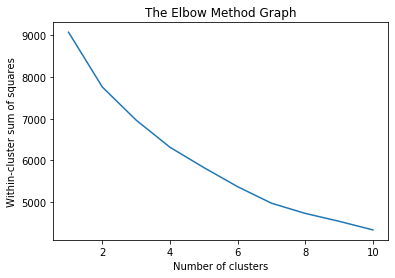

In [13]:
plt.plot(range(1,11), Within_Cluster_Sum_Of_Squares)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

In [14]:
K_Means = KMeans(n_clusters=4, init ='k-means++', max_iter=500, n_init=10,random_state=0)
Y_KMeans = K_Means.fit_predict(TopSongsUnclustered)

In [15]:
TopSongs['cluster']=Y_KMeans
TopSongs

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
0,As It Was,As It Was,Harry Styles,2022-03-31,2.788383,96,0.520,0.34200,0.731,0.001010,0.3110,-5.338,0.0557,173.930,4,0
1,I Ain't Worried,I Ain’t Worried (Music From The Motion Picture...,OneRepublic,2022-05-13,2.474750,97,0.704,0.08260,0.797,0.000745,0.0546,-5.927,0.0475,139.994,4,0
2,All Too Well (10 Minute Version) (Taylor's Ver...,Red (Taylor's Version),Taylor Swift,2021-11-12,10.217100,85,0.631,0.27400,0.518,0.000000,0.0880,-8.771,0.0303,93.023,4,2
3,About Damn Time,About Damn Time,Lizzo,2022-04-14,3.197033,90,0.836,0.09950,0.743,0.000000,0.3350,-6.305,0.0656,108.966,4,0
4,Awkward,Ctrl (Deluxe),SZA,2022-06-09,2.966667,78,0.618,0.18200,0.474,0.000122,0.1080,-12.097,0.0789,119.999,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783,Semi-Charmed Life,Third Eye Blind,Third Eye Blind,1997-04-08,4.472667,75,0.640,0.00832,0.864,0.000000,0.1230,-6.576,0.0314,102.026,4,0
1784,90x180,90x180,Eno,2022-09-23,2.571217,71,0.822,0.48000,0.564,0.005720,0.1290,-10.726,0.0931,139.982,4,2
1785,AM Remix,AM Remix,Nio Garcia,2021-06-24,4.355567,80,0.743,0.11400,0.655,0.000000,0.0764,-5.015,0.1590,172.031,4,0
1792,Ni Diablo Ni Santo,Ni Diablo Ni Santo,Julión Álvarez y su Norteño Banda,2017-05-26,2.593333,74,0.833,0.43900,0.608,0.000000,0.2960,-4.804,0.0824,120.010,3,2


In [16]:
cluster_0 =TopSongs[TopSongs["cluster"] == 0]
cluster_1 =TopSongs[TopSongs["cluster"] == 1]
cluster_2 =TopSongs[TopSongs["cluster"] == 2]
cluster_3 =TopSongs[TopSongs["cluster"] == 3]

In [17]:
Cluster_Count= dict(TopSongs.cluster.value_counts())
keys = Cluster_Count.keys()
for k in sorted(keys):
    print(k,Cluster_Count[k])

0 494
1 175
2 211
3 27


## Pop

In [18]:
filepath_pop = Path(r'Data\Pop_Songs.csv')  
filepath_pop.parent.mkdir(parents=True, exist_ok=True) 
cluster_0.to_csv(filepath_pop)

## Rap

In [19]:
filepath_rap = Path(r'Data\Rap_Songs.csv')  
filepath_rap.parent.mkdir(parents=True, exist_ok=True) 
cluster_1.to_csv(filepath_rap)

## Alternative

In [20]:
filepath_alternative = Path(r'Data\Alternative_Songs.csv')  
filepath_alternative.parent.mkdir(parents=True, exist_ok=True) 
cluster_2.to_csv(filepath_alternative)

## New Age

In [21]:
filepath_NewAge = Path(r'Data\NewAge_Songs.csv')  
filepath_NewAge.parent.mkdir(parents=True, exist_ok=True) 
cluster_3.to_csv(filepath_NewAge)

In [22]:
genres=['Pop', 'Rap', 'Alternative', 'New Age']

In [23]:
popularity_pop=np.array(cluster_0['popularity']).tolist()
popularity_rap=np.array(cluster_1['popularity']).tolist()
popularity_alternative=np.array(cluster_2['popularity']).tolist()
popularity_newage=np.array(cluster_3['popularity']).tolist()
popularity_data=[popularity_pop,popularity_rap,popularity_alternative,popularity_newage]

In [24]:
df_popularity_anova=pd.DataFrame(data=popularity_data, index=genres).transpose()
df_popularity_anova

,Pop,Rap,Alternative,New Age
0,96.0,84.0,85.0,84.0
1,97.0,90.0,78.0,83.0
2,90.0,90.0,88.0,88.0
3,92.0,82.0,87.0,80.0
4,86.0,85.0,84.0,82.0
...,...,...,...,...
489,75.0,NaN,NaN,NaN
490,73.0,NaN,NaN,NaN
491,75.0,NaN,NaN,NaN
492,80.0,NaN,NaN,NaN


### Kruskal Wallis Test

In [25]:
result = stats.kruskal(popularity_pop,popularity_rap,popularity_alternative,popularity_newage)
print(result)

KruskalResult(statistic=25.690063380401774, pvalue=1.1074125665940203e-05)


Test successful as p-value<0.05

### Levene's Test

In [26]:
result_mean=stats.levene(popularity_pop,popularity_rap,popularity_alternative,popularity_newage, center='mean')
print(result_mean)

LeveneResult(statistic=1.8139030801425, pvalue=0.14298562934137582)


In [27]:
result_median=stats.levene(popularity_pop,popularity_rap,popularity_alternative,popularity_newage, center='median')
print(result_median)

LeveneResult(statistic=1.8917168492093384, pvalue=0.12934677803096)


Test successful as p_value>0.5 for both cases (mean and median)

### Hypothesis involved:
A one-way ANOVA has the below given null and alternative hypotheses:

H0 (null hypothesis): It implies that the means of all the population are equal
H1 (alternate hypothesis): It states that there will be at least one population mean that differs from the rest

In [28]:
from scipy.stats import f_oneway
anova_result=f_oneway(popularity_pop,popularity_rap,popularity_alternative,popularity_newage)
print(anova_result)

F_onewayResult(statistic=8.749213987554294, pvalue=1.0068002501458034e-05)


Since the p-value<0.05, null hypothesis is rejected. Therefore, we can say that the popularity of genres vary from each other.

### Tukey-Kramer Procedure

In [29]:
popularity_pop_TK = np.array(cluster_0['popularity'], dtype='float64')

In [30]:
popularity_rap_TK = np.array(cluster_1['popularity'],dtype='float64')
rap_mean=np.repeat(round(cluster_1['popularity'].mean(),2), repeats=len(popularity_pop_TK)-len(popularity_rap_TK))
popularity_rap_TK=np.concatenate((popularity_rap_TK,rap_mean), axis=None)

In [31]:
popularity_alternative_TK = np.array(cluster_2['popularity'], dtype='float64')
alternative_mean=np.repeat(round(cluster_2['popularity'].mean(),2), repeats=len(popularity_pop_TK)-len(popularity_alternative_TK))
popularity_alternative_TK=np.concatenate((popularity_alternative_TK,alternative_mean), axis=None)

In [32]:
popularity_newage_TK = np.array(cluster_3['popularity'], dtype='float64')
newage_mean=np.repeat(round(cluster_3['popularity'].mean(),2), repeats=len(popularity_pop_TK)-len(popularity_newage_TK))
popularity_newage_TK=np.concatenate((popularity_newage_TK,newage_mean), axis=None)

In [33]:
popularity_data_TK = popularity_pop_TK.tolist() + popularity_rap_TK.tolist()+ popularity_alternative_TK.tolist() + popularity_newage_TK.tolist()
len(popularity_data_TK)

1976

In [34]:
pop=np.repeat(['pop'], repeats=len(popularity_pop_TK)).tolist()
rap=np.repeat(['rap'], repeats=len(popularity_pop_TK)).tolist()
alternative=np.repeat(['Alternative'], repeats=len(popularity_pop_TK)).tolist()
newage=np.repeat(['New Age'], repeats=len(popularity_pop_TK)).tolist()
genres=pop+rap+alternative+newage
len(genres)

1976

In [35]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df_popularity_TK = pd.DataFrame({'popularity': popularity_data_TK, 'genres': genres})
df_popularity_TK

,popularity,genres
0,96.00,pop
1,97.00,pop
2,90.00,pop
3,92.00,pop
4,86.00,pop
...,...,...
1971,79.85,New Age
1972,79.85,New Age
1973,79.85,New Age
1974,79.85,New Age


In [36]:
result_tukey = pairwise_tukeyhsd(endog = df_popularity_TK['popularity'],
                                 groups = df_popularity_TK['genres'],
                                 alpha = 0.05)
print(result_tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
   group1    group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Alternative New Age  -0.4297 0.2985 -1.0613  0.2018  False
Alternative     pop   0.8578 0.0028  0.2263  1.4894   True
Alternative     rap  -1.6903  0.001 -2.3219 -1.0588   True
    New Age     pop   1.2876  0.001   0.656  1.9191   True
    New Age     rap  -1.2606  0.001 -1.8921 -0.6291   True
        pop     rap  -2.5482  0.001 -3.1797 -1.9166   True
----------------------------------------------------------
